# Phishing link detection Flask Application using url feature analysis and ML
### 


Importing dependencies for the project


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
import pickle
print("Imported successfully")

Imported successfully


In [36]:
phish_data_df = pd.read_csv('.\phishing_site_urls.csv')
phish_data_df.head()
# phish_data_df.iloc[0]["URL"]

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


#### Balance of the Data

In [41]:
label_counts = pd.DataFrame(phish_data_df.Label.value_counts())
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

AttributeError: 'DataFrame' object has no attribute 'Label'

In [3]:
phish_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
phish_data_df.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
X = phish_data_df['URL']
Y = phish_data_df['Label']
print(X)
print(Y)

0         nobell.it/70ffb52d079109dca5664cce6f317373782/...
1         www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2         serviciosbys.com/paypal.cgi.bin.get-into.herf....
3         mail.printakid.com/www.online.americanexpress....
4         thewhiskeydregs.com/wp-content/themes/widescre...
                                ...                        
549341                                      23.227.196.215/
549342                                   apple-checker.org/
549343                                    apple-iclods.org/
549344                                   apple-uptoday.org/
549345                                    apple-search.info
Name: URL, Length: 549346, dtype: object
0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print("Train and Test data successfully splitted")

Train and Test data successfully splitted


#### Converting the text data to feature vectors using TfidFVectorizer

In [7]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Vectors created")

Vectors created


#### Logistic Regression Model Training

In [8]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)

In [9]:
lr.fit(X_train_vec,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [10]:
test_acc = lr.predict(X_test_vec)

In [11]:
score_acc = accuracy_score(Y_test,test_acc)
print("The accuracy score of the trained logistic regression model is {:2f}".format(score_acc))

The accuracy score of the trained logistic regression model is 0.956758


In [12]:
lr.score(X_test_vec,Y_test)

0.9567579867115682

In [13]:
Scores_ML = {}
Scores_ML['LogisticRegression'] = lr.score(X_test_vec,Y_test)

#### Random Forest Classifier Training

In [14]:
# rf = RandomForestClassifier(n_estimators=10)
# print("rf trained")
print("")

In [15]:
# rf.fit(X_train_vec,Y_train)
# print("rf trained")

#### support Vector Machine

In [16]:
# svm_model = SVC()
# svm_model.fit(X_train_vec, Y_train)
print("svm trained")

svm trained


#### Multinomial NB Model

In [18]:
import seaborn as sns

### Confusion Matrix and Accuracy score of Logistic Regression Model

Training Accuracy : 0.9686467520410671
Testing Accuracy : 0.9567579867115682

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.97      0.92     28192
        Good       0.99      0.95      0.97     81678

    accuracy                           0.96    109870
   macro avg       0.93      0.96      0.95    109870
weighted avg       0.96      0.96      0.96    109870


CONFUSION MATRIX


<Axes: >

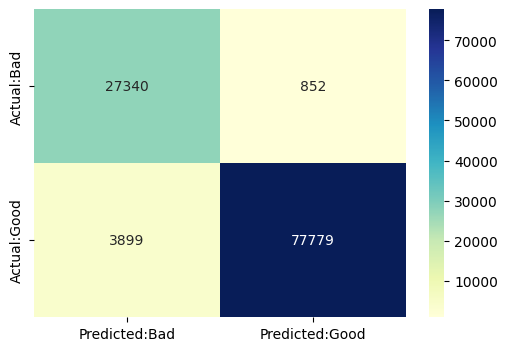

In [19]:

print('Training Accuracy :',lr.score(X_train_vec,Y_train))
print('Testing Accuracy :',lr.score(X_test_vec,Y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test_vec), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test_vec), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### Creating pipeline for the Logistic regression model

In [28]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Adjust max_features as needed
    ('nb', LogisticRegression(solver='liblinear', max_iter=1000))
])
print("pipeline created")

pipeline created


In [29]:
pipeline.fit(X_train,Y_train)
print(pipeline.score(X_test,Y_test))

0.9563575134249568


In [30]:
with open('pipeline_with_LR_Tfid.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [40]:
# loading the pickel
with open('pipeline_with_LR_Tfid.pkl', 'rb') as model_file:
    loaded_pipeline = pickle.load(model_file)
    new_data_text = ['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526']
    predictions = loaded_pipeline.predict(new_data_text)
    print(predictions)
    

['bad']
